In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
zer = x==0
print (x[1:][zer[:-1]].max())

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    return int(round(np.min(np.abs(X - v)), 1) + v)
nearest_value(X, v)

NameError: name 'X' is not defined

In [ ]:
A = np.array([[14, 12, 100],[23, 45, 43],[90, 50, 90]])
v = 5.1
print(int(round(np.min(np.abs(A - v)), 1) + v))


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    return (X - X.mean()) / np.std(X)

In [5]:
X = np.random.randint(1, 10, size=(3,5))

print(X)
scale(X)

[[7 7 9 3 1]
 [7 1 6 5 3]
 [7 7 7 5 7]]


array([[ 0.6568748 ,  0.6568748 ,  1.51366802, -1.05671163, -1.91350485],
       [ 0.6568748 , -1.91350485,  0.22847819, -0.19991842, -1.05671163],
       [ 0.6568748 ,  0.6568748 ,  0.6568748 , -0.19991842,  0.6568748 ]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [6]:
def get_stats(k):
    
    print('определитель: ', np.linalg.det(k).round(8))
    print('след: ', np.trace(k).round(8))
    print('наименьший элемент: ', np.min(k).round(8))
    print('наибольший элемент: ', np.max(k).round(8))
    print('норма Фробениуса:', np.linalg.norm(k, ord='fro').round(8))
    print('собственные числа: ', np.linalg.eigvals(k))
    print('Обратная матрица: ', np.linalg.inv(k).round(8))
                      
    return
k = np.random.normal(10, 1, (3, 3))
print (k)
get_stats(k)

[[11.58466566 10.59985609 10.11627919]
 [ 9.53333233 10.69743226  9.32308989]
 [11.79387955  9.14857947  9.90072881]]
определитель:  9.88508132
след:  32.18282673
наименьший элемент:  9.14857947
наибольший элемент:  11.79387955
норма Фробениуса: 31.01542442
собственные числа:  [30.93638175  0.36077831  0.88566667]
Обратная матрица:  [[ 2.08590566 -1.25408341 -0.95040192]
 [ 1.57494518 -0.46671798 -1.16974535]
 [-3.94005654  1.92514264  2.3140149 ]]


5. (0.2 балла) Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [7]:
e = np.empty(100)
for exp_num in range(100):
    X = np.empty(1000)
    for i in range(1000):
        x1 = np.random.normal(0, 1, (10, 10))
        x2 = np.random.normal(0, 1, (10, 10))
        X[i] = np.max(x1.dot(x2))
    e[exp_num] = np.average(X)
print('Cреднее значение по экспериментам у максимальных элементов: ', np.average(e))
print('95-процентная квантиль', np.percentile(e, 95))

Cреднее значение по экспериментам у максимальных элементов:  8.389700251332059
95-процентная квантиль 8.485246727132045


Pandas


Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.
Данные и их описание

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data The data set is available for download here. The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

Year 2008 Month 1-12 DayofMonth 1-31 DayOfWeek 1 (Monday) - 7 (Sunday)
DepTime actual departure time (local, hhmm)
CRSDepTime scheduled departure time (local, hhmm)
ArrTime actual arrival time (local, hhmm)
CRSArrTime scheduled arrival time (local, hhmm)
UniqueCarrier unique carrier code
FlightNum flight number
TailNum plane tail number: aircraft registration, unique aircraft identifier
ActualElapsedTime in minutes
CRSElapsedTime in minutes
AirTime in minutes
ArrDelay arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).
DepDelay departure delay, in minutes
Origin origin IATA airport code
Dest destination IATA airport code
Distance in miles
TaxiIn taxi in time, in minutes
TaxiOut taxi out time in minutes
Cancelled *was the flight cancelled
CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
Diverted 1 = yes, 0 = no
CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [8]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('2008.csv')

6. (0.3 балла) Какая из причин отмены рейса (CancellationCode) была самой частой? (расшифровки кодов можно найти в описании данных)

In [9]:

data['CancellationCode'].value_counts().idxmax()

'A'

7. (0.3 балла) Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
print('max = ', data['Distance'].max())
print('min = ', data['Distance'].min())
print('mean = ', data['Distance'].mean())

max =  4962
min =  31
mean =  724.5082571428571


8. (0.3 балла) Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [11]:
data.loc[data['Distance'] == 31, ['FlightNum', 'Year', 'Month', 'DayofMonth', 'Distance']]

,FlightNum,Year,Month,DayofMonth,Distance
1116,65,2008,12,30,31
6958,65,2008,12,26,31
17349,64,2008,8,18,31
27534,64,2008,3,11,31
46082,65,2008,8,9,31
48112,64,2008,2,28,31


In [12]:
data.loc[(data['FlightNum'] == 64) | (data['FlightNum'] == 65), ['FlightNum', 'Year', 'Month', 'DayofMonth', 'Distance']]

,FlightNum,Year,Month,DayofMonth,Distance
501,64,2008,3,20,533
1116,65,2008,12,30,31
1389,64,2008,3,13,680
1517,65,2008,7,10,680
2619,64,2008,5,23,2381
...,...,...,...,...,...
66529,65,2008,12,21,82
67172,64,2008,3,22,533
68264,65,2008,9,7,386
68338,65,2008,8,3,2454


9. (0.3 балла) Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [13]:
data['Origin'].value_counts().idxmax()

'ATL'

10. (0.3 балла) Найдите для каждого аэропорта среднее время полета (AirTime) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [14]:
data.loc[:, ['Origin', 'AirTime']].groupby(['Origin']).agg('mean').sort_values(by='AirTime')

,AirTime
Origin,
GST,13.000000
WRG,18.000000
OXR,19.666667
PSG,20.250000
MKG,21.500000
...,...
STT,185.029412
PSE,191.875000
BQN,193.954545


11. (0.5 балла) Найдите аэропорт, у которого наибольшая доля задержанных (DepDelay > 0) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию filter после groupby).

In [15]:
data12343 = data.loc[data['DepDelay'] > 0, ['Origin', 'DepDelay']].groupby(['Origin']).agg('sum').filter(data['Origin'].value_counts() >= 1000)
data12343

""
Origin
ABE
ABI
ABQ
ABY
ACK
...
VPS
WRG
XNA


Линейная регрессия
В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

Подготовка данных

12. (0.5 балла) Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:

Имеются ли в данных пропущенные значения?
Сколько всего пропущенных элементов в таблице "объект-признак"?
Сколько объектов имеют хотя бы один пропуск?
Сколько признаков имеют хотя бы одно пропущенное значение?

In [16]:
print(data.isnull().sum())

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


In [17]:
print('Всего пропущенных элементов:', data.isnull().sum().sum())

Всего пропущенных элементов: 355215


In [18]:
print('Количество объектов, имеющих хотя бы 1 пропуск:', np.count_nonzero(np.array(data.isnull().sum(axis = 1))))
print('Количество признаков, имеющих хотя бы 1 пропуск:', np.count_nonzero(np.array(data.isnull().sum())))


Количество объектов, имеющих хотя бы 1 пропуск: 70000
Количество признаков, имеющих хотя бы 1 пропуск: 16


Количество признаков, имеющих хотя бы 1 пропуск: 16
Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:

Имеются ли пропущенные значения в целевой переменной?
Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.
Исключите из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [19]:
print(data['DepDelay'].isnull().sum())

1399


In [20]:
print(data[data['DepDelay'].isnull() == True])

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1          21          1      NaN        1630      NaN   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
11           1940    

In [21]:
print(data[data['DepDelay'].isnull() == False])

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

In [22]:
print('Количество отмененных рейсов, для которых нет данных по "DepDelay":',
    len(data[(data['Cancelled'] == 1) & (data['DepDelay'].isnull() == True)]))

print('Количество отмененных рейсов, для которых есть данные по "DepDelay":',
      len(data[(data['Cancelled'] == 1) & (data['DepDelay'].isnull() == False)]))
print('Количество пустых строк для признака "CancellationCode":',
      data.loc[:, 'CancellationCode'].isnull().sum())
print('Суммарное количество рейсов:',len(data))
print('Количество пустых строк по последним столбцам:')
print(data.loc[:, ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].isnull().sum())
print('Количество объектов, для которых значение признака "Diverted" равно нулю:',
     len(data[data['Diverted'] == 0]))
print('Количество объектов, для которых значение признака "Diverted" равно нулю и ненулевое значение "DepDelay":',
     len(data[(data['Diverted'] == 0) & (data['DepDelay'] != 0)]))

Количество отмененных рейсов, для которых нет данных по "DepDelay": 1399
Количество отмененных рейсов, для которых есть данные по "DepDelay": 12
Количество пустых строк для признака "CancellationCode": 68589
Суммарное количество рейсов: 70000
Количество пустых строк по последним столбцам:
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64
Количество объектов, для которых значение признака "Diverted" равно нулю: 69829
Количество объектов, для которых значение признака "Diverted" равно нулю и ненулевое значение "DepDelay": 64651


In [23]:
df = pd.read_csv('2008.csv')
df = df[(df['DepDelay'].isnull() == False)]
df = df[(df['DepDelay'] != 0)]
df.drop(['Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', \
         'Diverted'], axis = 1, inplace = True)
df.index = np.arange(len(df))
y = np.array(df['DepDelay'])
X = df.drop('DepDelay', axis = 1)

13. (0.5 балла) Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName_Hour, FeatureName_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [24]:
print(X.loc[:, ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].isnull().sum())

DepTime         0
CRSDepTime      0
ArrTime       140
CRSArrTime      0
dtype: int64


In [25]:
def get_hour(n):
    nums = list(map(str, str(int(n))))
    hours = ''.join(nums[:-2])
    return hours

def get_min(n):
    nums = list(map(str, str(int(n))))
    minutes = ''.join(nums[-2:])
    return minutes

In [26]:
X_at = X[X['ArrTime'].isnull() == False]

In [27]:
X['DepTime_Hour'] = pd.to_numeric(X['DepTime'].apply(get_hour))
X['DepTime_Minute'] = pd.to_numeric(X['DepTime'].apply(get_min))
X['CRSDepTime_Hour'] = pd.to_numeric(X['CRSDepTime'].apply(get_hour))
X['CRSDepTime_Minute'] = pd.to_numeric(X['CRSDepTime'].apply(get_min))
X['ArrTime_Hour'] = pd.to_numeric(X_at['ArrTime'].apply(get_hour))
X['ArrTime_Minute'] = pd.to_numeric(X_at['ArrTime'].apply(get_min))
X['CRSArrTime_Hour'] = pd.to_numeric(X['CRSArrTime'].apply(get_hour))
X['CRSArrTime_Minute'] = pd.to_numeric(X['CRSArrTime'].apply(get_min))

X.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)

14. (0.5 балла) Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [28]:
import seaborn as sns

X.drop(['TailNum', 'Year'], axis = 1, inplace = True)
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

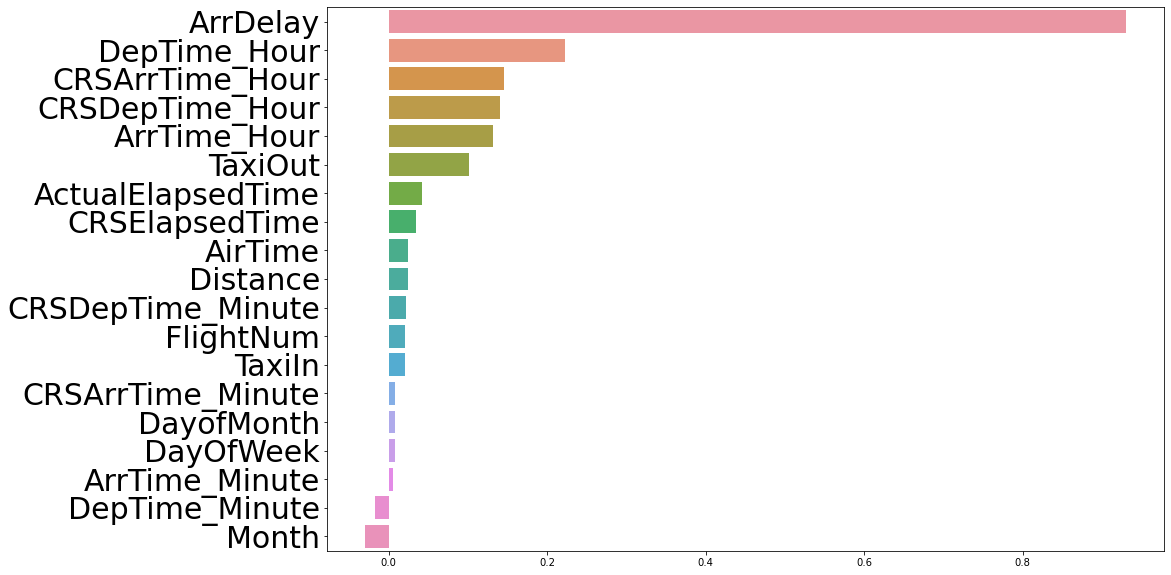

In [30]:
X_f = X.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_f[feature], y)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]


plot = sns.barplot(y = features_order, x = correlations,)
plot.set_yticklabels(features_order, fontsize = 30)
plot.figure.set_size_inches(15, 10)

In [31]:
X.drop('ArrDelay', axis = 1, inplace = True)#сильно коррелируется

15. (1 балл) Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.



<AxesSubplot:>

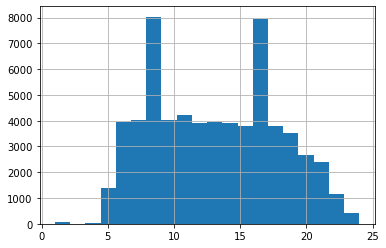

In [32]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

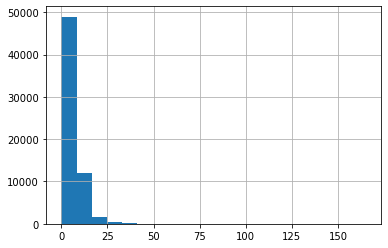

In [33]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

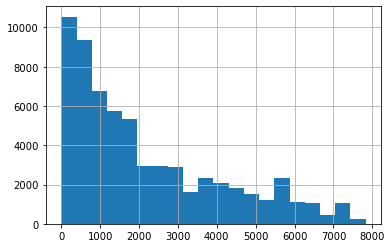

In [34]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

На графиках видно, что разные признаки принимают значения из значительно отличающихся диапозонов, значения их отличаются на порядки. Масштабирование поможет уравнять признаки, их возможную значимость для модели.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или one-hot-кодирование.

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:

Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
Масштабирование вещественных признаков с помощью StandardScaler.
One-hot-кодирование категориальных признаков с помощью DictVectorizer или функции pd.get_dummies.
Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
def transform_data(data):
    numeric_features = data.select_dtypes([np.number]).columns
    object_features = data.select_dtypes([object]).columns
    data[numeric_features] = data[numeric_features].fillna(0)
    data[object_features] = data[object_features].fillna('nan')
    
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])
    
    object_data_transform = pd.get_dummies(data[object_features])
    data = pd.concat([data, object_data_transform], axis = 1)
    
    data.drop(object_features, axis = 1, inplace = True)
    
    return data

In [37]:

new = transform_data(X)
new

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,0
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,0



16. (0.5 балла) Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию train_test_split).

In [38]:
from sklearn.model_selection import train_test_split

In [43]:
new = np.array(new)
x_train, x_test, y_train, y_test = train_test_split(new, y, test_size = 0.3, random_state = 15)